<h1>PROYECTO FINAL - DATASET OBESITY y BBC-NEWS</h1>

Clasificación Grado de Obesidad y BBC-News

<br>

Loayza Pizarro Fernando
Grupo de Estudio Scikit Learn

In [1]:
#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

---
<a id="section1"></a>
# Introducción

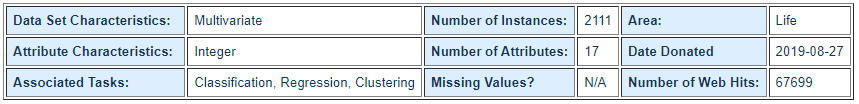

* El dataset es libre se encuentra en la plataforma UCI (https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+).

*   Es un dataset donde se va estimar el nivel de obesidad de personas nacidas en los paises de Mexico, Perú y Colombia basandose en sus hábitos de alimentación y condiciones físicas.
*   Contiene 17 atributos con 2111 registros cada uno, etiquetadas por la clase NObesity.
* El 77% de los registros se generaron sinteticamente.



---
<a id="section1"></a>
## Librerias y Carga dataset

In [2]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

dir="/content/drive/MyDrive/DataSets"
os.chdir(dir)
print(os.getcwd())

/content/drive/MyDrive/DataSets


In [61]:
dataset='ObesityDataSet.csv'
df=pd.read_csv(dataset, encoding='latin-1', sep=',')
df

Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936  ...  Public_Transportation     Obesity_Type_III
2110  Female  23.664709  ...  Public_Transportation     Obesity_Type_III

[2111 rows x 17 columns]

---
<a id="section1"></a>
## Exploración de datos

In [ ]:
df.describe()

Age       Height  ...          FAF          TUE
count  2111.000000  2111.000000  ...  2111.000000  2111.000000
mean     24.312600     1.701677  ...     1.010298     0.657866
std       6.345968     0.093305  ...     0.850592     0.608927
min      14.000000     1.450000  ...     0.000000     0.000000
25%      19.947192     1.630000  ...     0.124505     0.000000
50%      22.777890     1.700499  ...     1.000000     0.625350
75%      26.000000     1.768464  ...     1.666678     1.000000
max      61.000000     1.980000  ...     3.000000     2.000000

[8 rows x 8 columns]

In [7]:
varNumericas = list(df.describe().columns)
varCategoricas = list(set(df.columns).difference(df.describe().columns))

In [ ]:
varCategoricas

['NObeyesdad',
 'Gender',
 'family_history_with_overweight',
 'CAEC',
 'SMOKE',
 'MTRANS',
 'CALC',
 'FAVC',
 'SCC']

### Número de registros por nivel de obesidad

In [ ]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

### Valores nulos o vacios

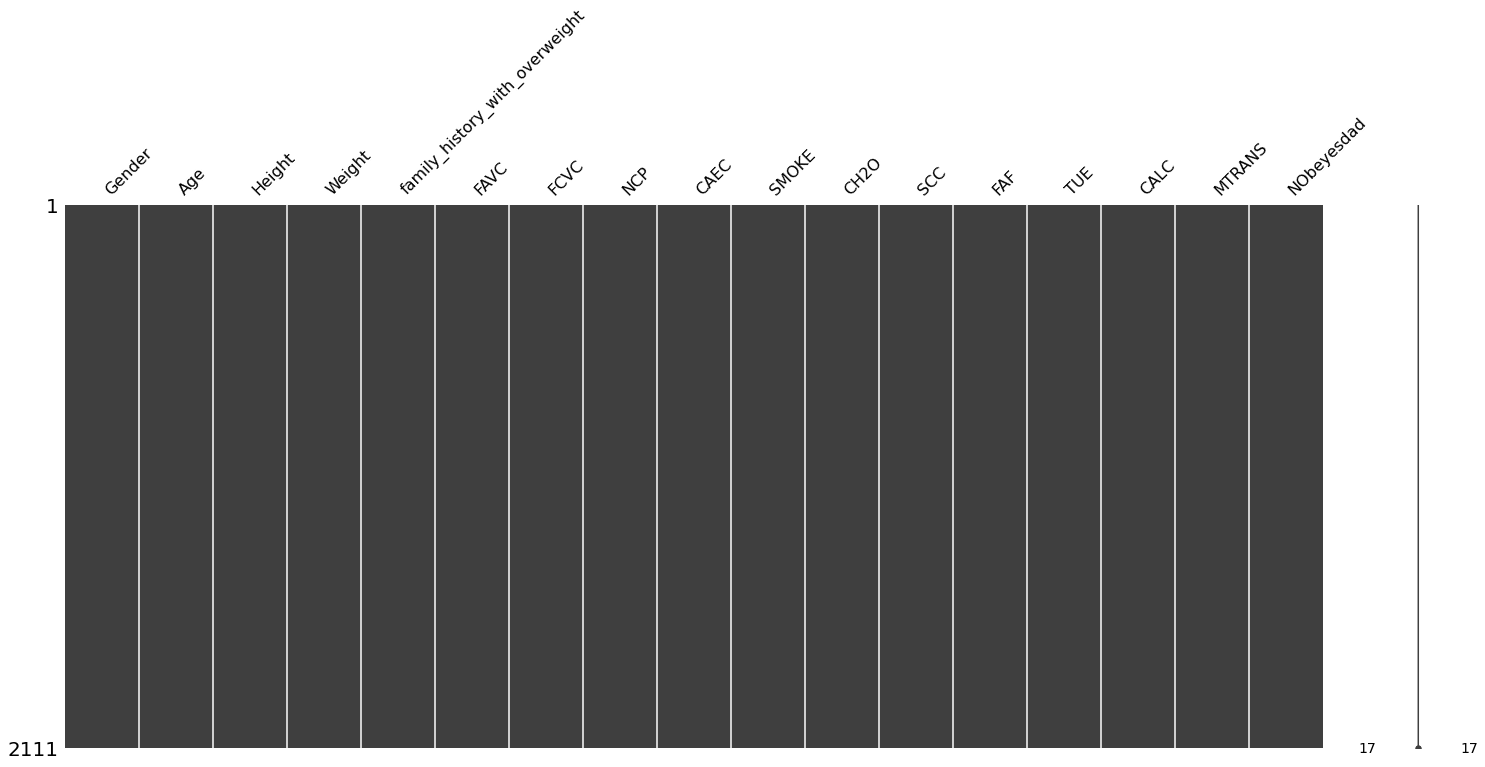

In [ ]:
#utilizando la librería missigno verificamos los datos nulos en el dataset
ms.matrix(df)

In [ ]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in df.loc[:, df.isna().any()].columns:                                     
  print('En la columna',col,'hay',df[col].isna().sum(),'valores nulos')
## Todas las columnas estan completas

### Influencia de las variables respecto al tarjet

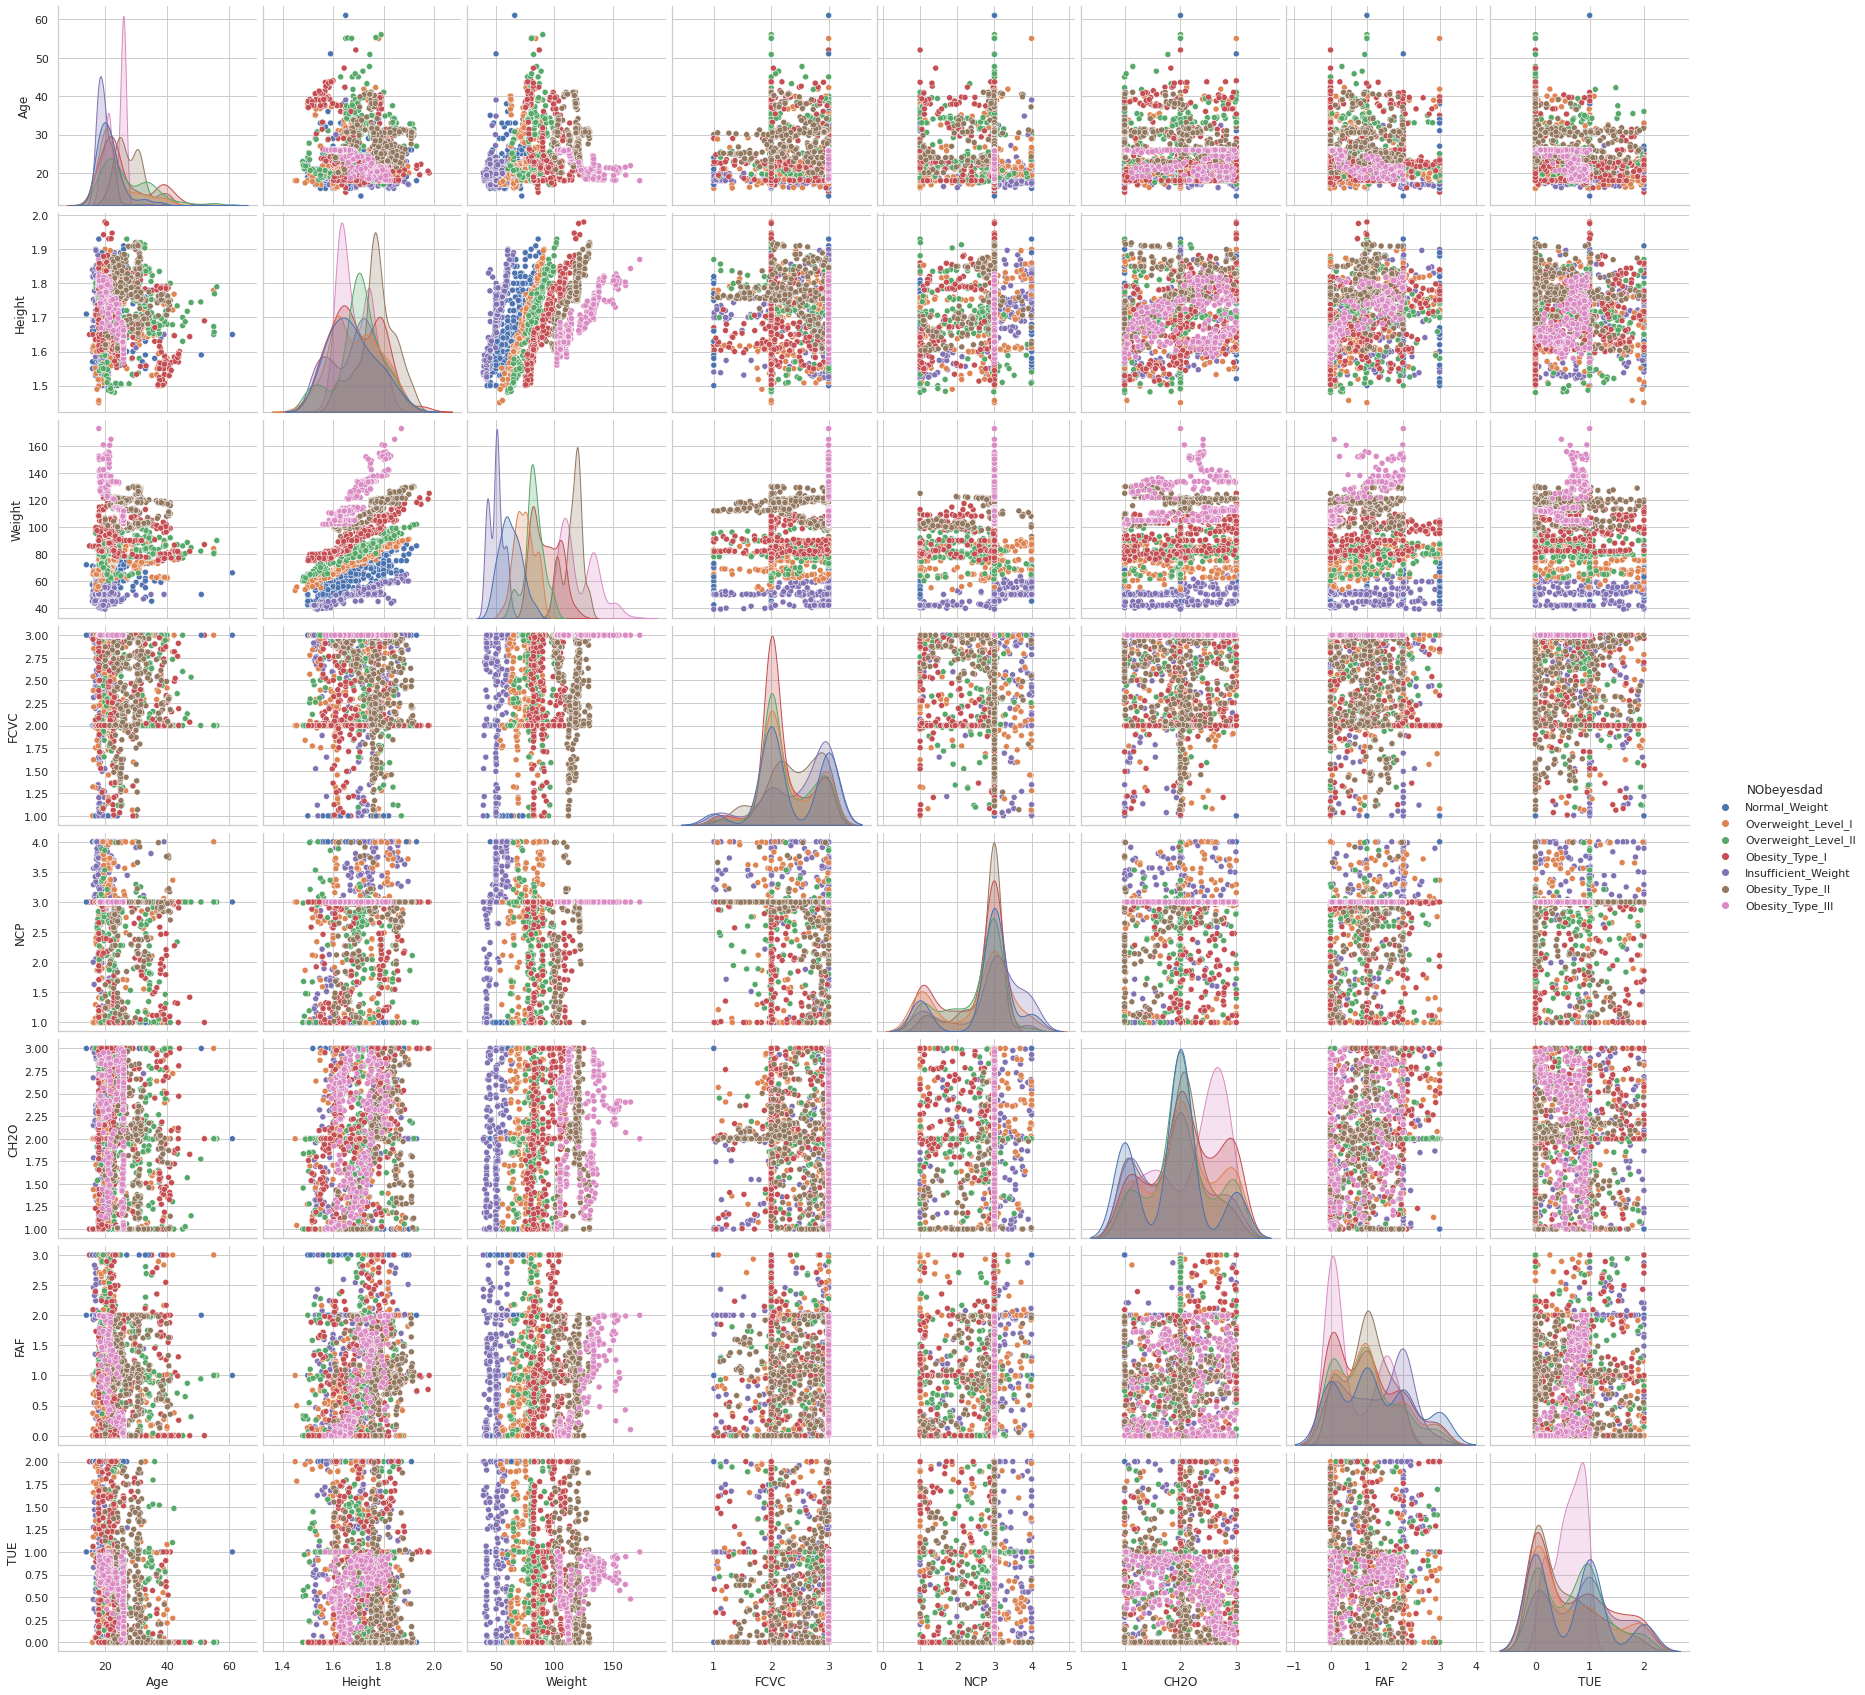

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="NObeyesdad", size=3);
plt.show()

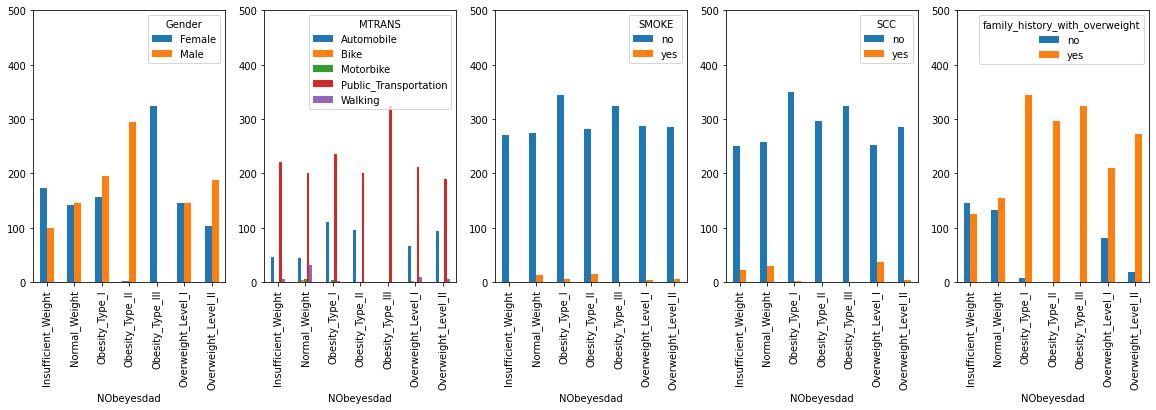

In [ ]:
#revisando las influencias de mis variables

fig,(ax1, ax2, ax3, ax4, ax5)=plt.subplots(ncols=5,figsize=(20,5))
pd.crosstab(df['NObeyesdad'], df['Gender']).plot(kind='bar',ax=ax1, ylim=[0,500])
pd.crosstab(df['NObeyesdad'], df['MTRANS']).plot(kind='bar',ax=ax2, ylim=[0,500])
pd.crosstab(df['NObeyesdad'], df['SMOKE']).plot(kind='bar',ax=ax3, ylim=[0,500])
pd.crosstab(df['NObeyesdad'], df['SCC']).plot(kind='bar',ax=ax4, ylim=[0,500])
pd.crosstab(df['NObeyesdad'], df['family_history_with_overweight']).plot(kind='bar',ax=ax5, ylim=[0,500])

### Preprocesamiento

In [62]:
import numpy as np
#Correlacion entre variables Categoricas#
df_categorical=df.loc[:,df.dtypes==np.object]


# Para tener al final la VARIABLE OBJETIVO
df_categorical = df_categorical[varCategoricas]
df_categorical.head()

NObeyesdad                 MTRANS  ...  Gender       CAEC
0        Normal_Weight  Public_Transportation  ...  Female  Sometimes
1        Normal_Weight  Public_Transportation  ...  Female  Sometimes
2        Normal_Weight  Public_Transportation  ...    Male  Sometimes
3   Overweight_Level_I                Walking  ...    Male  Sometimes
4  Overweight_Level_II  Public_Transportation  ...    Male  Sometimes

[5 rows x 9 columns]

In [63]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 
# RECORREMOS CADA COLUMNA DEL DF_categorical
for i in df_categorical.columns:
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])
df_categorical_encoded

NObeyesdad  MTRANS  FAVC  ...  CALC  Gender  CAEC
0              1       3     0  ...     3       0     2
1              1       3     0  ...     2       0     2
2              1       3     0  ...     1       1     2
3              5       4     0  ...     1       1     2
4              6       3     0  ...     2       1     2
...          ...     ...   ...  ...   ...     ...   ...
2106           4       3     1  ...     2       0     2
2107           4       3     1  ...     2       0     2
2108           4       3     1  ...     2       0     2
2109           4       3     1  ...     2       0     2
2110           4       3     1  ...     2       0     2

[2111 rows x 9 columns]

In [64]:
for n in varCategoricas:
  df[n] = df_categorical_encoded[n]

In [65]:
df.head()

Gender   Age  Height  Weight  ...  TUE  CALC  MTRANS  NObeyesdad
0       0  21.0    1.62    64.0  ...  1.0     3       3           1
1       0  21.0    1.52    56.0  ...  0.0     2       3           1
2       1  23.0    1.80    77.0  ...  1.0     1       3           1
3       1  27.0    1.80    87.0  ...  0.0     1       4           5
4       1  22.0    1.78    89.8  ...  0.0     2       3           6

[5 rows x 17 columns]

### Outliers

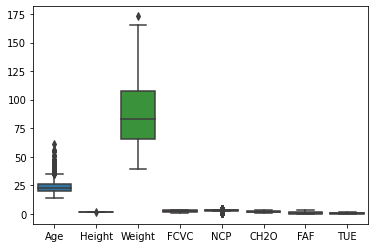

In [12]:
bp = df.loc[:, varNumericas]
#sns.set(rc={'figure.figsize':(18,7)})
sns.boxplot(data=bp)

### Mapa de calor

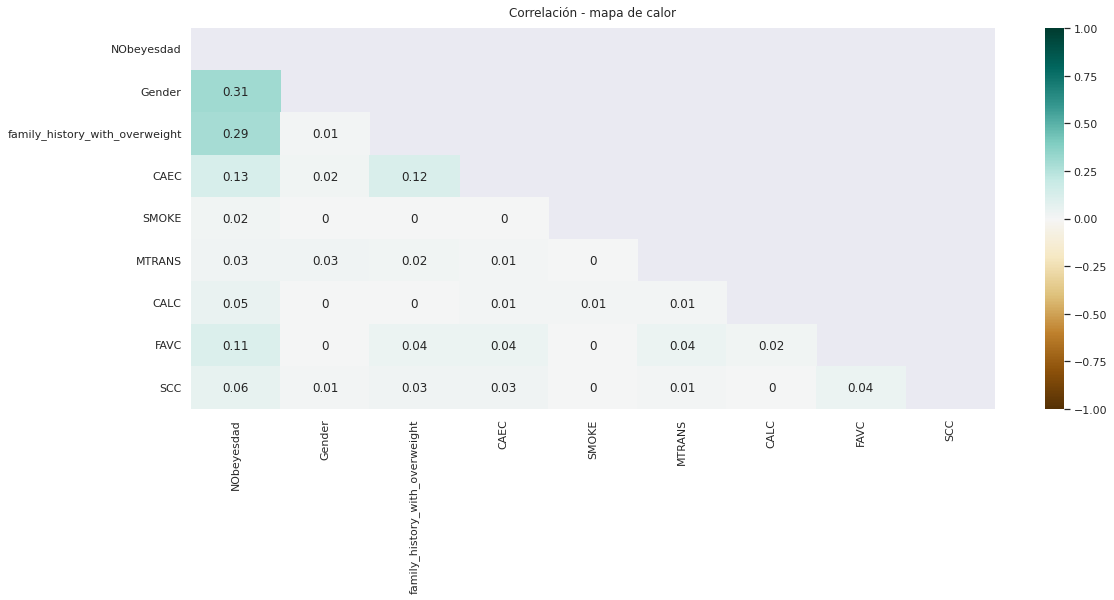

In [ ]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
  col = []
  for var2 in df_categorical_encoded :
    cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))

cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize':12}, pad=12);

## Split Data

In [66]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [67]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# codificamos
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# codificacion en caliente ( hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [68]:
from sklearn.model_selection import train_test_split
#Separa el 20% de la data para generar las predicciones
X_train, X_val, y_train, y_val= train_test_split(X,dummy_y,test_size = 0.20,random_state=1) 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers, callbacks

In [ ]:
#early stopping para evitar el overfitting

early_stopping = callbacks.EarlyStopping(
    min_delta=0.005,   #cantidad mínima de cambio para contar como una mejora
    patience=20,      #cuantas epocas esperar para detener el entrenamiento
    restore_best_weights=True
    )

In [ ]:
batch_size = 3
epochs = 50

## Modelo Red Neuronal

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=len(X.columns), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

In [ ]:
#definir optimizador, función de pérdida y métricas

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#definir tamaño de lote, épocas, etc.
history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping]
        )

Epoch 1/50
563/563 [==============================] - 2s 3ms/step - loss: 2.7571 - accuracy: 0.2826 - val_loss: 1.5422 - val_accuracy: 0.3853
Epoch 2/50
563/563 [==============================] - 1s 2ms/step - loss: 1.4435 - accuracy: 0.3999 - val_loss: 1.3417 - val_accuracy: 0.4728
Epoch 3/50
563/563 [==============================] - 1s 2ms/step - loss: 1.2765 - accuracy: 0.4526 - val_loss: 1.2109 - val_accuracy: 0.4965
Epoch 4/50
563/563 [==============================] - 1s 2ms/step - loss: 1.1650 - accuracy: 0.4917 - val_loss: 1.2111 - val_accuracy: 0.4988
Epoch 5/50
563/563 [==============================] - 1s 2ms/step - loss: 1.1034 - accuracy: 0.5207 - val_loss: 1.0845 - val_accuracy: 0.5343
Epoch 6/50
563/563 [==============================] - 1s 2ms/step - loss: 1.0348 - accuracy: 0.5415 - val_loss: 0.9974 - val_accuracy: 0.6052
Epoch 7/50
563/563 [==============================] - 2s 3ms/step - loss: 0.9759 - accuracy: 0.5776 - val_loss: 0.9352 - val_accuracy: 0.6123
Epoch 

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


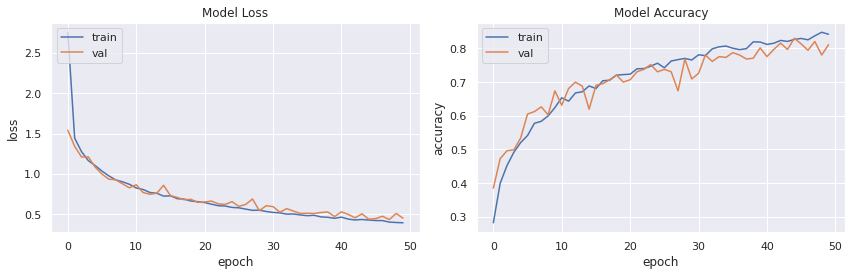

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

In [ ]:
# Predicting the Test set results
y_predicted = model.predict(X_val)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_labels = [np.argmax(i) for i in y_val]
cm = tf.math.confusion_matrix(labels=y_labels, predictions=y_predicted_labels)

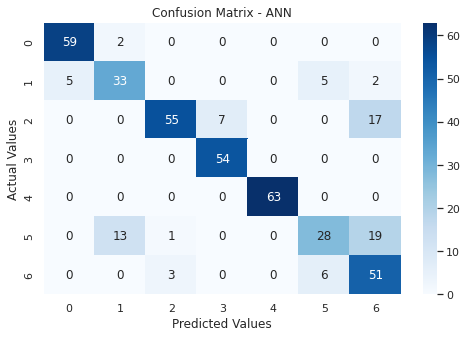

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# Predicting the Test set results
y_predicted = classifier.predict(X_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, y_predicted))

Accuracy: 0.8486997635933806


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_labels = [np.argmax(i) for i in y_val]
cm = tf.math.confusion_matrix(labels=y_labels, predictions=y_predicted_labels)

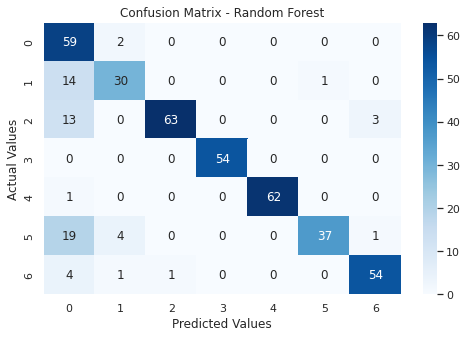

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_predicted = knn_clf.predict(X_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, y_predicted))

Accuracy: 0.8817966903073287


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_labels = [np.argmax(i) for i in y_val]
cm = tf.math.confusion_matrix(labels=y_labels, predictions=y_predicted_labels)

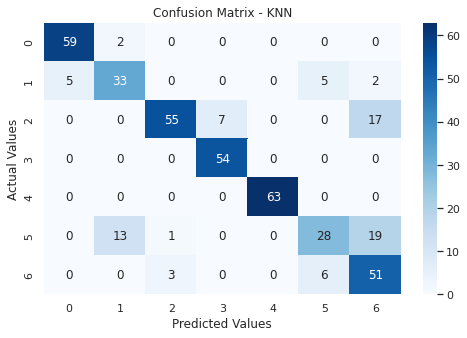

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Clustering k-means

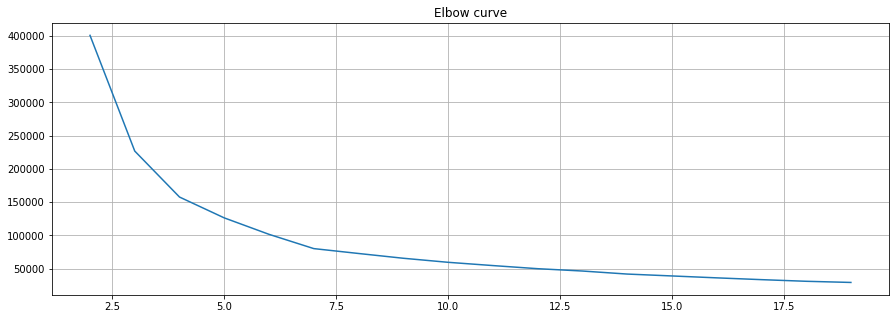

In [69]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X_train)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [70]:
from scipy.cluster.vq import kmeans, vq
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 5

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(X_train,7)
# assign each sample to a cluster
idx,_ = vq(X_train,centroids)

In [71]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (NObeyesdad Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(y,idx)]

In [73]:
labels =['NObeyesdad', 'Cluster']
df_ = pd.DataFrame.from_records(details, columns=labels)
df_.head(n=10)

NObeyesdad  Cluster
0           1        0
1           1        3
2           1        4
3           5        0
4           6        3
5           1        4
6           1        2
7           1        0
8           1        3
9           1        2

# Procesamiento de Lenguaje natural

In [ ]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dir="/content/drive/MyDrive/DataSets"
os.chdir(dir)
print(os.getcwd())

/content/drive/MyDrive/DataSets


In [ ]:
dataset='bbc-news.csv'
df=pd.read_csv(dataset, encoding='latin-1', sep=',')
df = df[['text', 'category']]
df

text       category
0     tv future in the hands of viewers with home th...           tech
1     worldcom boss  left books alone  former worldc...       business
2     tigers wary of farrell  gamble  leicester say ...          sport
3     yeading face newcastle in fa cup premiership s...          sport
4     ocean s twelve raids box office ocean s twelve...  entertainment
...                                                 ...            ...
2220  cars pull down us retail figures us retail sal...       business
2221  kilroy unveils immigration policy ex-chatshow ...       politics
2222  rem announce new glasgow concert us band rem h...  entertainment
2223  how political squabbles snowball it s become c...       politics
2224  souness delight at euro progress boss graeme s...          sport

[2225 rows x 2 columns]

In [ ]:
df.iloc[15]['text']

's korean credit card firm rescued south korea s largest credit card firm has averted liquidation following a one trillion won ($960m; Â£499m) bail-out.  lg card had been threatened with collapse because of its huge debts but the firm s creditors and its former parent have stepped in to rescue it. a consortium of creditors and lg group  a family owned conglomerate  have each put up $480m to stabilise the firm. lg card has seven million customers and its collapse would have sent shockwaves through the country s economy.  the firm s creditors - which own 99% of lg card - have been trying to agree a deal to secure its future for several weeks. they took control of the company in january when it avoided bankruptcy only through a $4.5bn bail-out.  they had threatened to delist the company  a move which would have triggered massive debt redemptions and forced the company into bankruptcy  unless agreement was reached on its future funding.  lg card will not need any more financial aid after t

In [ ]:
# One-hot-encoding label
category = pd.get_dummies(df.category)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='category')
new_df

text  business  ...  sport  tech
0     tv future in the hands of viewers with home th...         0  ...      0     1
1     worldcom boss  left books alone  former worldc...         1  ...      0     0
2     tigers wary of farrell  gamble  leicester say ...         0  ...      1     0
3     yeading face newcastle in fa cup premiership s...         0  ...      1     0
4     ocean s twelve raids box office ocean s twelve...         0  ...      0     0
...                                                 ...       ...  ...    ...   ...
2220  cars pull down us retail figures us retail sal...         1  ...      0     0
2221  kilroy unveils immigration policy ex-chatshow ...         0  ...      0     0
2222  rem announce new glasgow concert us band rem h...         0  ...      0     0
2223  how political squabbles snowball it s become c...         0  ...      0     0
2224  souness delight at euro progress boss graeme s...         0  ...      1     0

[2225 rows x 6 columns]

In [ ]:
texts = new_df['text'].values
label = new_df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

from sklearn.model_selection import train_test_split
train_texts, test_texts, train_label, test_label = train_test_split(texts, label, test_size=0.2)

In [ ]:
print(len(train_texts))
print(len(train_label))
print(len(test_texts))
print(len(test_label))

1780
1780
445
445


In [ ]:
# steemming (lematizacion y radicalizacion)
import numpy as np
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

porterStemmer = PorterStemmer()

fixed_train_texts = []
for text in train_texts:
  removed_text = remove_stopwords(text)   # Stopword removal
  removed_text = porterStemmer.stem_sentence(removed_text) # Port steemming
  fixed_train_texts.append(removed_text)

fixed_train_texts = np.array(fixed_train_texts, dtype='O')   # Train set 

fixed_test_texts = []
for text in test_texts:
  removed_text = remove_stopwords(text)
  removed_text = porterStemmer.stem_sentence(removed_text) # Port steemming
  fixed_test_texts.append(removed_text)

fixed_test_texts = np.array(fixed_test_texts, dtype='O')  # Test set

In [ ]:
print(f'text ({len(train_texts[0])}): {train_texts[0]}')
print(f'removed ({len(fixed_train_texts[0])}): {fixed_train_texts[0]} ({len(fixed_train_texts[0])})')

text (2981): asia shares defy post-quake gloom indonesian  indian and hong kong stock markets reached record highs.  investors seemed to feel that some of the worst-affected areas were so under-developed that the tragedy would have little impact on asia s listed firms.  obviously with a lot of loss of life  a lot of time is needed to clean up the mess  bury the people and find the missing   said abn amro s eddie wong.  [but] it s not necessarily a really big thing in the economic sense.   india s bombay stock exchange inched slightly above its previous record close on wednesday. expectations of strong corporate earnings in 2005 drove the indonesian stock exchange in jakarta to a record high on wednesday. in hong kong  the hang seng index may be benefiting in part from the potential for its listed property companies to gain from rebuilding contracts in the tsunami-affected regions of south east asia. in sri lanka  some economists have said that as much as 1% of annual growth may be lost

In [ ]:
vocab_size = 5000
oov_tok = '<OOV>'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(fixed_train_texts)
tokenizer.fit_on_texts(fixed_test_texts)
word_index = tokenizer.word_index

In [ ]:
# Bag of words
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'game': 8,
 'mr': 5,
 'new': 6,
 'peopl': 7,
 's': 2,
 'said': 3,
 't': 10,
 'time': 9,
 'year': 4}

In [ ]:
# sample sequence
train_sequences = tokenizer.texts_to_sequences(fixed_train_texts)
test_sequences = tokenizer.texts_to_sequences(fixed_test_texts)

# sequence Padding
padded_train = pad_sequences(train_sequences)
padded_test = pad_sequences(test_sequences)

## Modelo ANN

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Tentukan optimizer dan loss function model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
hist = model.fit(
    padded_train, train_label,
    validation_data=(padded_test, test_label),
    epochs=20,
    batch_size=128,
    verbose=2)

Epoch 1/20
14/14 - 33s - loss: 1.6050 - accuracy: 0.2466 - val_loss: 1.5974 - val_accuracy: 0.2180 - 33s/epoch - 2s/step
Epoch 2/20
14/14 - 30s - loss: 1.6090 - accuracy: 0.3230 - val_loss: 1.4754 - val_accuracy: 0.4562 - 30s/epoch - 2s/step
Epoch 3/20
14/14 - 30s - loss: 1.3804 - accuracy: 0.4522 - val_loss: 1.1900 - val_accuracy: 0.4157 - 30s/epoch - 2s/step
Epoch 4/20
14/14 - 30s - loss: 1.1337 - accuracy: 0.4315 - val_loss: 1.0483 - val_accuracy: 0.4652 - 30s/epoch - 2s/step
Epoch 5/20
14/14 - 30s - loss: 0.9731 - accuracy: 0.4815 - val_loss: 0.9443 - val_accuracy: 0.4629 - 30s/epoch - 2s/step
Epoch 6/20
14/14 - 30s - loss: 0.8486 - accuracy: 0.5669 - val_loss: 0.8395 - val_accuracy: 0.5888 - 30s/epoch - 2s/step
Epoch 7/20
14/14 - 30s - loss: 0.7061 - accuracy: 0.6303 - val_loss: 0.7770 - val_accuracy: 0.5955 - 30s/epoch - 2s/step
Epoch 8/20
14/14 - 30s - loss: 0.6545 - accuracy: 0.6337 - val_loss: 0.7702 - val_accuracy: 0.5730 - 30s/epoch - 2s/step
Epoch 9/20
14/14 - 30s - loss: 0

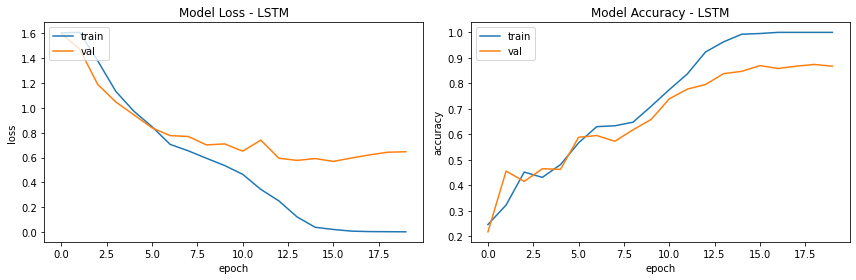

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss - LSTM')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy - LSTM')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(hist)

## Testeo

In [ ]:
max_length = 200

txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
#txt = ["Will Smith has boosted his hopes of winning his first Oscar after being nominated for a Screen Actors Guild award, one of Hollywood's top prizes."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred)

[[4.1630201e-06 8.6232609e-01 1.9626617e-03 1.3570450e-01 2.5393581e-06]]


In [ ]:
labels[np.argmax(pred)]

'bussiness'